# **READ FACEIMAGES.MAT FILE AND DISPLAY ORIGINAL IMAGE**

In [6]:
!pip install hdf5storage

     |████████████████████████████████| 61kB 1.8MB/s 


In [0]:
#Read the the images data
import hdf5storage
mat = hdf5storage.loadmat('/content/drive/My Drive/PRML_LAB/faceimages.mat')

In [0]:
import numpy as np

data_matrix = mat.get('data')
np.save('/content/drive/My Drive/PRML_LAB/faceimages.npy',data_matrix)

In [0]:
import numpy as np

data_matrix = np.load('/content/drive/My Drive/PRML_LAB/faceimages.npy')

In [10]:
data_matrix.shape

(400, 10305)

In [0]:
data_matrix_labels = data_matrix[:,[10304]]

In [0]:
data_matrix_features = data_matrix[:,[ i for i in range(10304) ]]

In [13]:
data_matrix_features.shape

(400, 10304)

In [0]:
row = data_matrix_features[0]

In [0]:
image = row.reshape((92,112))

In [230]:
image.T.shape

(112, 92)

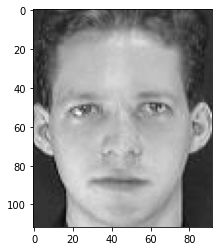

In [231]:
from matplotlib import pyplot as plt
plt.imshow(image.T,cmap='gray')
plt.show()


# **MEAN CENTERING THE DATA**

In [0]:
import numpy as np
data_matrix_features_mean = np.mean(data_matrix_features,axis = 0)

data_matrix_features_mean_centered = data_matrix_features - data_matrix_features_mean.reshape((1,10304))

In [16]:
data_matrix_features_mean_centered.shape

(400, 10304)

# **EIGEN VALUES AND EIGEN VECTORS OF COVARIANCE MATRIX**

In [0]:
import numpy as np
C = np.cov(data_matrix_features_mean_centered.T)

In [10]:
C.shape

(10304, 10304)

In [0]:
EigVal,EigVec = np.linalg.eig(C)

In [0]:
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

In [0]:
import numpy as np
np.save('/content/drive/My Drive/PRML_LAB/eigen_values.npy',EigVal)
np.save('/content/drive/My Drive/PRML_LAB/eigen_vectors.npy',EigVec)

In [0]:
import numpy as np

EigVal = np.load('/content/drive/My Drive/PRML_LAB/eigen_values.npy')
EigVec = np.load('/content/drive/My Drive/PRML_LAB/eigen_vectors.npy')


# **LOW DIMENSIONAL REPRESENTATION USING PCA**

In [166]:
top_2_eigen_vectors = EigVec[:,:2]
top_2_eigen_vectors.shape

(10304, 2)

In [0]:
Y =  np.matmul(top_2_eigen_vectors.T,data_matrix_features.T).T
Y =  np.abs(Y)

In [205]:
Y.shape

(400, 2)

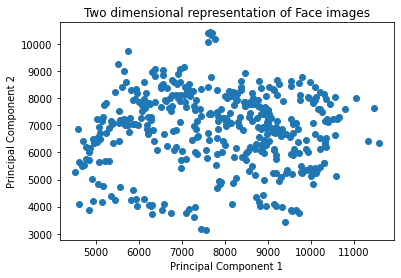

In [206]:
from matplotlib import pyplot as plt
plt.scatter(Y[:,[0]],Y[:,[1]])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Two dimensional representation of Face images")
plt.show()

# **ENERYGY CURVE**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


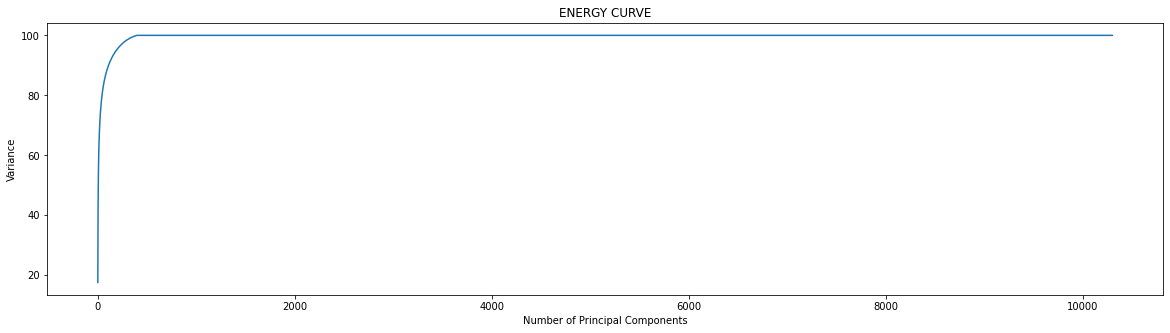

In [227]:
from matplotlib import pyplot as plt

cumulative_eigen_values = []

total_sum = sum(EigVal)

cumulative_sum = 0
for i in range(len(EigVal)):
  cumulative_sum+= EigVal[i] * 100 / total_sum
  cumulative_eigen_values.append(cumulative_sum)

num_principal_components = [i for i in range(len(EigVal)) ]
plt.figure(figsize = (20,5))
plt.plot(num_principal_components,cumulative_eigen_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance")
plt.title("ENERGY CURVE")
plt.show()

# **RECONSTRUCTING FACE IMAGES FROM PRINCIPAL COMPONENTS**

##################################################


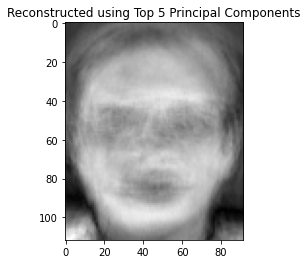

Reconstruction Error(RMSE):  12737.455238287615


##################################################


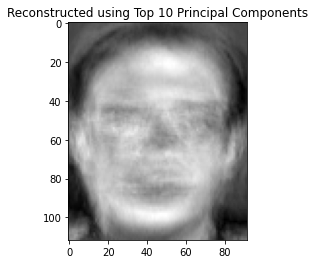

Reconstruction Error(RMSE):  13237.529574587368


##################################################


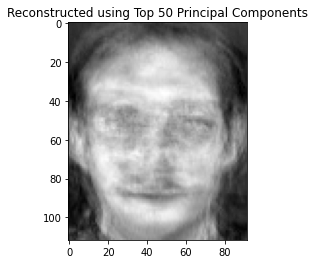

Reconstruction Error(RMSE):  13531.897359024166


##################################################


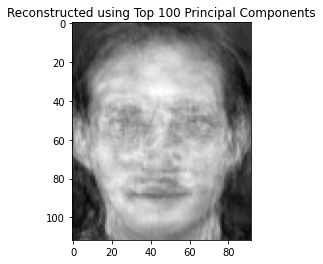

Reconstruction Error(RMSE):  13548.2388330182


##################################################


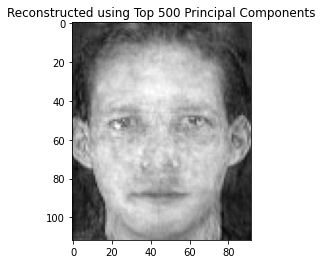

Reconstruction Error(RMSE):  13471.118866236644




In [215]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
for k in [5,10,50,100,500]:
  top_5_eigen_vectors = EigVec[:,:k]
  Y =  np.matmul(top_5_eigen_vectors.T,data_matrix_features.T).T

  #Reconstruct images from principal components
  reconstructed_images = np.matmul(Y,top_5_eigen_vectors.T) 
  reconstructed_images = np.abs(reconstructed_images)
  reconstructed_images += data_matrix_features_mean 

  #Display image
  print("#"*50)
  row = reconstructed_images[0]
  row_orig = data_matrix_features[0]
  image = row.reshape((92,112))
  plt.figure()
  plt.title("Reconstructed using Top "+ str(k) + " Principal Components")
  plt.imshow(image.T,cmap='gray')
  plt.show()

  #Compute RMSE
  root_mean_square_error = mean_squared_error(row_orig,row)
  print("Reconstruction Error(RMSE): ",root_mean_square_error)
  print("\n")